# Introduction
Недавно образовалась компания MLaaS, которая предоставляет платные услуги через Интернет. Компания растет, ей понадобилось улучшить инфраструктуру для обслуживания запросов. Сотрудники не хотят выделять *слишком* много ресурсов, поскольку это дорого обойдется. С другой стороны, надо зарезервировать *достаточное* число ресурсов, иначе есть риск не обработать все запросы и потерять прибыль. Коротко говоря, хотелось бы заранее знать, когда запросить дополнительные серверы в облаке, чтобы обслужить все поступающие запросы, при этом не платить за неиспользованные ресурсы

**Вопрос:** когда мы достигнем предельной пропускной способности инфраструктуры (100 000 запросов в час)?

# libraries

In [18]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('deep')
sns.set_style('darkgrid')

# Data loading
Данные представляют собой статистику веб за последний месяц: количество запросов в час (1 столбец соответствует *часу*, 2 - *числу запросов*)

In [6]:
data = np.genfromtxt('data/web_traffic.tsv', delimiter='\t')
print('Размер имеющихся данных:', data.shape)
data[:10]

Размер имеющихся данных: (743, 2)


array([[1.000e+00, 2.272e+03],
       [2.000e+00,       nan],
       [3.000e+00, 1.386e+03],
       [4.000e+00, 1.365e+03],
       [5.000e+00, 1.488e+03],
       [6.000e+00, 1.337e+03],
       [7.000e+00, 1.883e+03],
       [8.000e+00, 2.283e+03],
       [9.000e+00, 1.335e+03],
       [1.000e+01, 1.025e+03]])

# Data cleaning

In [8]:
X, y = data[:, 0], data[:, 1]
print('Чило пропущенных значений:', np.sum(np.isnan(y)))

Чило пропущенных значений: 8


In [9]:
# avoid nan objects
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

# Visual analysis

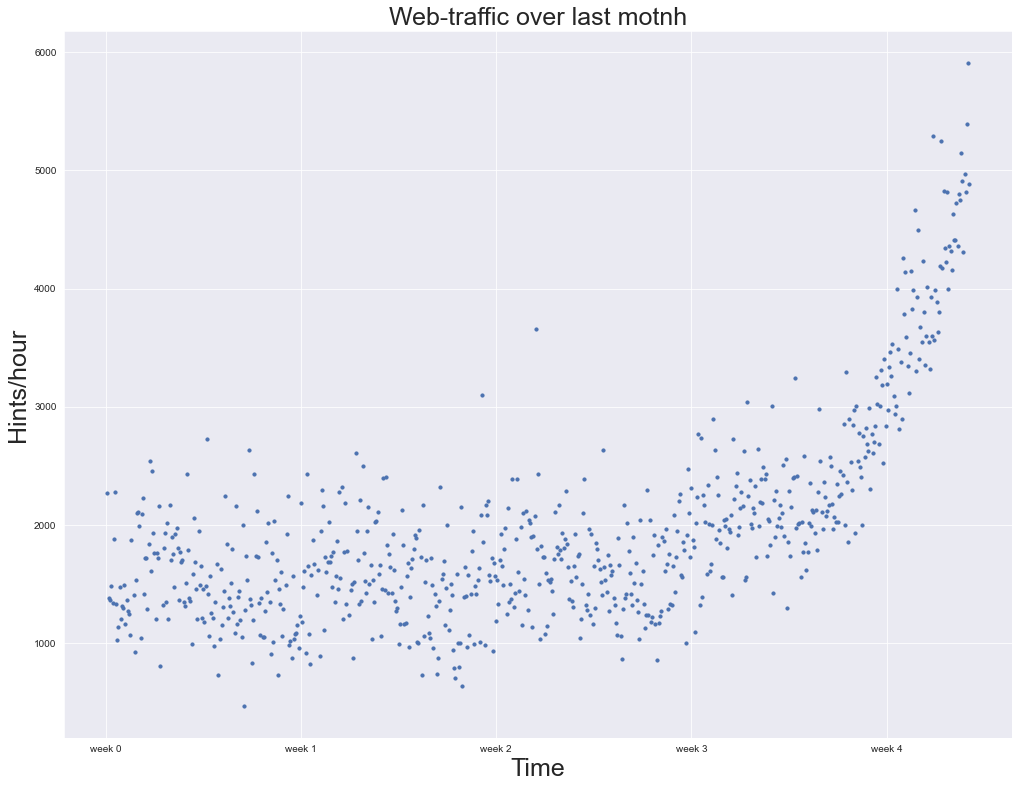

In [27]:
plt.figure(figsize=(17, 13))
plt.scatter(X, y, s=10)
plt.title('Web-traffic over last motnh', fontdict={'fontsize':25})
plt.ylabel('Hints/hour', fontdict={'fontsize':25})
plt.xlabel('Time', fontdict={'fontsize':25})
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale()
plt.show()

# Building ML model